In [1]:
#General Rules
#1. Feature Engineering ALWAYS after Splitting
#2. Split Data BEFORE EDA to avoid Data Leakage (https://machinelearningmastery.com/data-leakage-machine-learning/)
#3. Cut y from df_test and df_train after Feature Engineering
#3. Train the model on the train data set
#4. Hold back a validation set (which is a part of train-set) to validate your trained model

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
## == plt.show() happens automatically inside this notebook

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import os
import numpy as np

In [2]:
path=os.getcwd()
path

'/home/christoph/OneDrive/Fortbildung_Weiterbildung_Arbeit/2022_Spiced_Data_Science/Data_Science_Course/Working_Area/02_week/00_Project'

# Get data - Workflow Step 1

In [3]:
df_titanic= pd.read_csv(path+'/train.csv', sep=",") #Attention: this data file contains ALL the data, not just the train set!
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### short overview

In [4]:
#general information
df_titanic.describe()
#df_titanic.info() #just for train data, what if test data is "bad" and has lots of NaN? We don´t know yet...
df_titanic.count() #to see if there are columns with NaN --> Age, Cabin, Embarked

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
df_titanic.shape

(891, 12)

# Split Data Set - Train Data and Test Data - Workflow Step 2

## df_train and df_Test

In [6]:
#splits df_titanic randomly and horizontally into a train (80%) and test (20%) data set
#useful to store the train set INCLUDING Y in a variable df_train
#extracting y_test from df_test could happen here, also after Feature Engineering
df_train, df_test = train_test_split(df_titanic, test_size=0.2, random_state=101) #test_size generally around 20-25%

In [8]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C


In [9]:
#check if #rows of df_train and df_test is in total 891
df_train.shape[0]+df_test.shape[0]

891

# Explore Data (EDA) - Workflow Step 3

## general information about df_train

In [10]:
#general information whole train data
#either
df_train.describe()
#or
#X_train_concat.info() #just for train data, what if test data is "bad" and has lots of NaN? We don´t know yet...
# or
df_train.count() #Number of Non-NaN
# examine Age and Cabin concerning NaN's, see below

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            577
SibSp          712
Parch          712
Ticket         712
Fare           712
Cabin          157
Embarked       710
dtype: int64

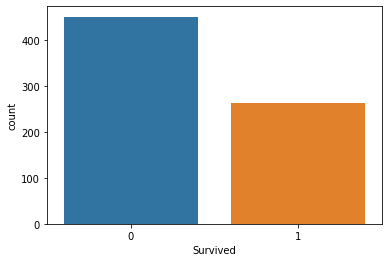

In [11]:
# distribution of response variable (target)
sns.countplot(x=df_train['Survived']);

In [12]:
df_dead=df_train[(df_train['Survived']==0)]['Survived']
df_dead.count()

450

In [13]:
df_survived=df_train[(df_train['Survived']==1)]['Survived']
df_survived.count()

262

In [14]:
#other possibility to get value of (un)survived
df_train['Survived'].value_counts()

0    450
1    262
Name: Survived, dtype: int64

In [15]:
#survival rate total
#df_dead=X_train_concat[(X_train_concat['Survived']==0)]['Survived']
#df_dead.count()
#df_total=X_train_concat.shape[0]
sr_total=(df_survived.count())/(df_survived.count()+df_dead.count())
print(f' {round(sr_total*100,2)} %')

 36.8 %


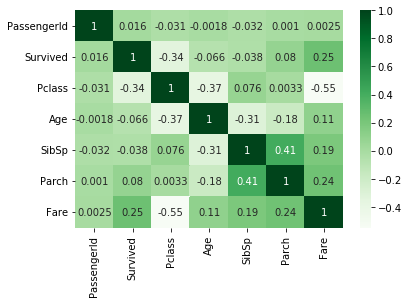

In [16]:
sns.heatmap(df_train.corr(),cmap="Greens",annot=True);
# age seems to have no influence 
# but Pclass and Fare do have

## information about each column (univariat and bivariat (to Survived))

### PassengerID

In [17]:
# should have no influence --> just a random number
#check if each passenger has its one ID
a=len(df_train['PassengerId'])
b=len(df_train['PassengerId'])==len(df_train['PassengerId'].unique())
print(a,b)

712 True


### Pclass

In [18]:
#Pclass
df_train["Pclass"].unique() #encoding afterwards necessary

array([2, 1, 3])

In [19]:
df_train.groupby(['Pclass','Survived']).size().unstack('Survived')

Survived,0,1
Pclass,,
1,65,101
2,79,71
3,306,90


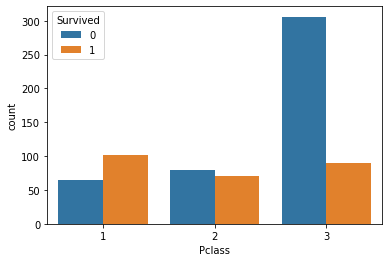

In [20]:
sns.countplot(data=df_train,x='Pclass',hue='Survived');
# being in class 3 seems to be a higher probability of non-surviving, the higher the class the higher the # of non-survivals

### Name

In [21]:
# are there doubles?
len(df_train['Name'].value_counts())==len(df_train['Name'].unique())

True

### Sex

In [22]:
#women and men in total
df_train['Sex'].value_counts().to_frame()
df_train['Sex'].value_counts(normalize=True)
#other possibilty
#df_train.groupby(['Sex'])['Survived'].count().to_frame()

male      0.650281
female    0.349719
Name: Sex, dtype: float64

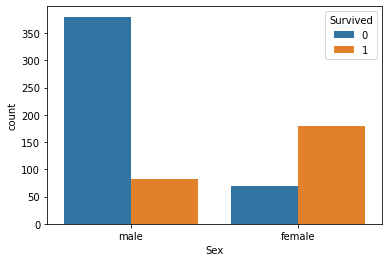

In [23]:
sns.countplot(data=df_train,x='Sex',hue='Survived');
#in total much more men died than women, but as we can see above, there are much more men embarked! Survival rates?

In [24]:
#check the survival rates --> huuuuge difference, sex seems to have an huge influence 
#men
df_dead_man=df_train[(df_train['Survived']==0)&(df_train['Sex']=='male')]['Survived']
dead_man=df_dead_man.count()
df_survived_man=df_train[(df_train['Survived']==1)&(df_train['Sex']=='male')]['Survived']
surv_man=df_survived_man.count()
sr_men=(surv_man)/(surv_man+dead_man)
print(f' {round(sr_men*100,2)} %')

 17.93 %


In [25]:
#women
df_dead_woman=df_train[(df_train['Survived']==0)&(df_train['Sex']=='female')]['Survived']
dead_woman=df_dead_woman.count()
df_survived_woman=df_train[(df_train['Survived']==1)&(df_train['Sex']=='female')]['Survived']
surv_woman=df_survived_woman.count()
sr_women=(surv_woman)/(surv_woman+dead_woman)
print(f' {round(sr_women*100,2)} %')

 71.89 %


### Age

In [26]:
df_train['Age'].describe()  #a lot of NaN's --> feature engineering necessary

count    577.000000
mean      29.689203
std       14.440088
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       74.000000
Name: Age, dtype: float64

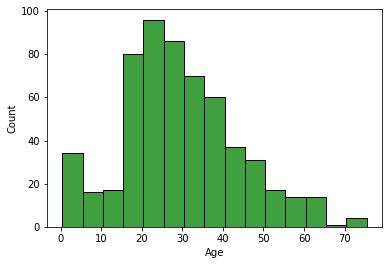

In [27]:
sns.histplot(data=df_train,x='Age',binwidth=5, color="green");

In [28]:
#although heatmap shows that there might be no influence of the age to the survival chance, let's have a look
#Survival rate grouped by age bins
#1. binning 'Age' with np.arange
age_bins=pd.cut(df_train['Age'],np.arange(0,80,5))
age_bins.to_frame()
df_train['Age bin']=age_bins
df_Age_Surv=df_train[['Survived','Age bin']]
df_Age_Surv

/home/christoph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,Age bin
733,0,"(20.0, 25.0]"
857,1,"(50.0, 55.0]"
81,1,"(25.0, 30.0]"
319,1,"(35.0, 40.0]"
720,1,"(5.0, 10.0]"
...,...,...
575,0,"(15.0, 20.0]"
838,1,"(30.0, 35.0]"
337,1,"(40.0, 45.0]"
523,1,"(40.0, 45.0]"


In [29]:
#2. apply the survival rate depending on the grouped age bin
df_Age_Surv_mean=df_Age_Surv.groupby(['Age bin']).mean()
df_Age_Surv_mean.columns=['Survival rate']
#df_Age_Surv_mean.reset_index()
df_Age_Surv_mean

,Survival rate
Age bin,
"(0, 5]",0.705882
"(5, 10]",0.312500
"(10, 15]",0.529412
"(15, 20]",0.337500
"(20, 25]",0.333333
"(25, 30]",0.360465
"(30, 35]",0.457143
"(35, 40]",0.433333
"(40, 45]",0.378378


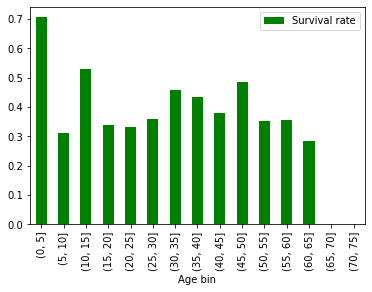

In [30]:
#3. plot the results
df_Age_Surv_mean.plot.bar(color="green");
# doesn't seem that elderly people have less chance to survive!

### Sibsp

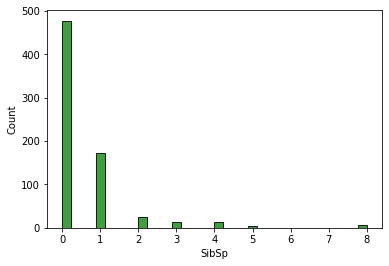

In [31]:
#SibSp means if there are ancestors on board
#How many people do have?
sns.histplot(data=df_train, x='SibSp', color="green");

In [32]:
# Are there differences in the survival rate?
df_SibSp=df_train.groupby(['SibSp','Survived']).size().unstack('Survived')
df_SibSp
#df_SibSp.plot.bar();

Survived,0,1
SibSp,,
0,319.0,158.0
1,85.0,87.0
2,13.0,11.0
3,10.0,4.0
4,12.0,2.0
5,5.0,NaN
8,6.0,NaN


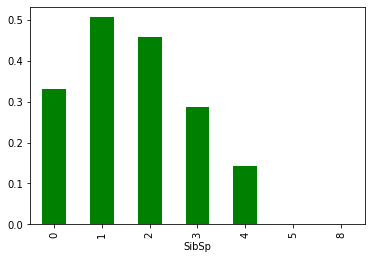

In [33]:
df_SibSp=df_train.groupby(['SibSp'])['Survived'].mean()
df_SibSp.plot.bar(color="green"); #passengers with 1 sibsp seems to have higher survival rate

### Parch

In [34]:
#Parch means if people have parents/children on board
#do the same from SibSp for Parch

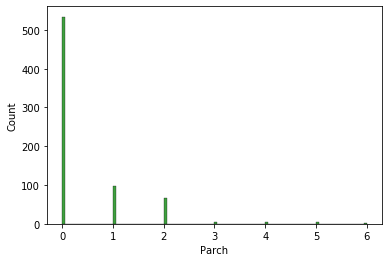

In [35]:
sns.histplot(data=df_train, x='Parch', color="green");

In [36]:
df_Parch=df_train.groupby(['Parch','Survived']).size().unstack('Survived')
df_Parch
#df_Parch.plot.bar();

Survived,0,1
Parch,,
0,359.0,175.0
1,46.0,52.0
2,36.0,31.0
3,1.0,3.0
4,4.0,NaN
5,3.0,1.0
6,1.0,NaN


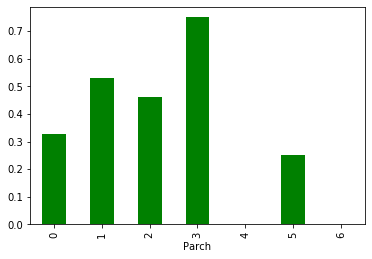

In [37]:
df_Parch=df_train.groupby(['Parch'])['Survived'].mean()
df_Parch.plot.bar(color="green"); #passengers with 1 or 2 parches seems to have higher survival rate, 3 and 5 is outlier,
#df_Parch

### Ticket

In [38]:
df_train['Ticket'].describe() #more counts than unique values --> 1 Ticket for more than 1 person

count         712
unique        567
top       CA 2144
freq            6
Name: Ticket, dtype: object

In [39]:
df_train[['Ticket','Name']].sort_values(by='Ticket').head(10) #for example: Mr. and Mrs. Taussig belong to the same Ticket/ORder #

,Ticket,Name
257,110152,"Cherry, Miss. Gladys"
504,110152,"Maioni, Miss. Roberta"
558,110413,"Taussig, Mrs. Emil (Tillie Mandelbaum)"
262,110413,"Taussig, Mr. Emil"
475,110465,"Clifford, Mr. George Quincy"
110,110465,"Porter, Mr. Walter Chamberlain"
430,110564,"Bjornstrom-Steffansson, Mr. Mauritz Hakan"
366,110813,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)"
170,111240,"Van der hoef, Mr. Wyckoff"
462,111320,"Gee, Mr. Arthur H"


In [40]:
#do same ticket # have the same result concerning (un)survived?
#df_Ticket_count=df_train.groupby(['Ticket']).count().sort_values(by='PassengerId',ascending=False)
df_Ticket_count=df_train.groupby(['Ticket','Survived'])['PassengerId'].count().to_frame()
df_Ticket_count=df_train.groupby(['Ticket','Survived']).size().unstack('Survived').fillna(0)
df_Ticket_count=df_Ticket_count.reset_index()
#df_Ticket_count=df_Ticket_count.rename(index={'Survived': 'index'})
#calculate amount of passenger pro ticket
df_Ticket_count['amount passenger']=df_Ticket_count[0]+df_Ticket_count[1]
#sort by amount passenger
df_Ticket_count=df_Ticket_count.sort_values(['amount passenger'],ascending=False)
#just keep in mind >1
df_Ticket_count=df_Ticket_count[df_Ticket_count['amount passenger']>1] #98 rows

df_Ticket_count

Survived,Ticket,0,1,amount passenger
284,347088,6.0,0.0,6.0
473,CA. 2343,6.0,0.0,6.0
210,3101295,6.0,0.0,6.0
281,347082,6.0,0.0,6.0
471,CA 2144,6.0,0.0,6.0
...,...,...,...,...
7,111361,0.0,2.0,2.0
68,16966,0.0,2.0,2.0
35,113789,1.0,1.0,2.0
70,17453,0.0,2.0,2.0


In [41]:
#Summe aller Leute die auf ein Ticket mit mindestens 2 Personen fahren
sum_Ticket_total=df_Ticket_count['amount passenger'].sum()
sum_Ticket_total

243.0

In [42]:
#df_Ticket_count.plot.bar(color="green"); #seems like there is an big influence of the ticket!

In [43]:
#plot is not so nice, try to show in a histo how many either dead or survived equals amount passenger (1) or not (0)
df_Ticket_count=df_Ticket_count.rename(columns={0:"dead",1:"survived"})
boundary1=df_Ticket_count['dead']!=0
boundary2=df_Ticket_count['survived']!=0
else_cond=df_Ticket_count['dead']+df_Ticket_count['survived']
df_Ticket_count['dead/survived=amount passenger']=np.where(boundary1&boundary2,0,else_cond)
df_Ticket_count


Survived,Ticket,dead,survived,amount passenger,dead/survived=amount passenger
284,347088,6.0,0.0,6.0,6.0
473,CA. 2343,6.0,0.0,6.0,6.0
210,3101295,6.0,0.0,6.0,6.0
281,347082,6.0,0.0,6.0,6.0
471,CA 2144,6.0,0.0,6.0,6.0
...,...,...,...,...,...
7,111361,0.0,2.0,2.0,2.0
68,16966,0.0,2.0,2.0,2.0
35,113789,1.0,1.0,2.0,0.0
70,17453,0.0,2.0,2.0,2.0


In [44]:
#Sum of people who had the same destiny with the others on the same ticket
sum_Ticket_same=df_Ticket_count['dead/survived=amount passenger'].sum()
sum_Ticket_same

160.0

In [45]:
#ratio of people with 1 ticket and same destiny
ratio_Ticket=sum_Ticket_same/sum_Ticket_total
print(f'{round(ratio_Ticket*100,2)}%')
#declare a binary column when ticket# is available more than once --> Feature Engineering

65.84%


### Fare

In [46]:
df_fare=df_train['Fare']
df_fare.describe()

count    712.000000
mean      31.513594
std       47.804939
min        0.000000
25%        7.925000
50%       14.458300
75%       30.625000
max      512.329200
Name: Fare, dtype: float64

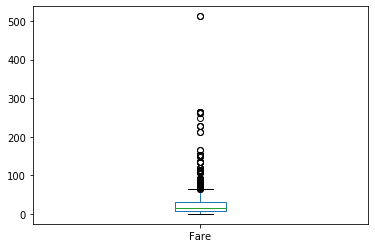

In [47]:
df_fare.plot(kind='box'); #1 outlier

In [48]:
#fare has influence on survivals?
fare_bins=pd.cut(df_train['Fare'],np.arange(0,300,20))

In [49]:
fare_bins.to_frame()
df_train['Fare bin']=fare_bins
df_fare_Surv=df_train[['Survived','Fare bin']]
df_fare_Surv

/home/christoph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,Fare bin
733,0,"(0, 20]"
857,1,"(20, 40]"
81,1,"(0, 20]"
319,1,"(120, 140]"
720,1,"(20, 40]"
...,...,...
575,0,"(0, 20]"
838,1,"(40, 60]"
337,1,"(120, 140]"
523,1,"(40, 60]"


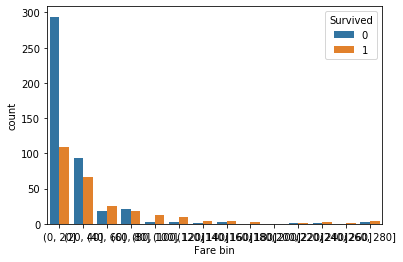

In [50]:
sns.countplot(data=df_fare_Surv,x='Fare bin',hue='Survived'); #higher fare means higher chance to survive?!

### Cabin

In [51]:
df_cabin=df_train['Cabin']
df_cabin.describe()

count         157
unique        119
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [52]:
len(df_cabin.value_counts())

119

In [53]:
len(df_cabin) #--> to much NaN's which could be hard substituted

712

In [54]:
df_cabin=df_train.groupby(['Cabin','Survived']).size().unstack('Survived')
df_cabin #looks like the assume from ticket, disadvantage is too much NaN's

Survived,0,1
Cabin,,
A10,1.0,NaN
A14,1.0,NaN
A16,NaN,1.0
A19,1.0,NaN
A20,NaN,1.0
...,...,...
F33,NaN,3.0
F38,1.0,NaN
F4,NaN,1.0


### Embarked

In [55]:
df_embarked=df_train['Embarked']
df_embarked.describe()

count     710
unique      3
top         S
freq      517
Name: Embarked, dtype: object

In [56]:
df_embarked.value_counts()


S    517
C    133
Q     60
Name: Embarked, dtype: int64

In [57]:
df_embarked=df_train.groupby(['Embarked','Survived'])['PassengerId'].count().to_frame()
df_embarked

PassengerId
Embarked Survived             
C        0                  62
         1                  71
Q        0                  39
         1                  21
S        0                 349
         1                 168

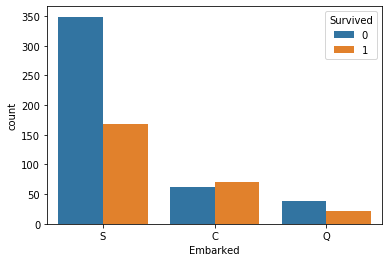

In [58]:
sns.countplot(data=df_train,hue='Survived',x='Embarked'); #high correlation between (un)survived and embarked!

## conclusion of EDA

- Which columns are going to be used in the model?
- How do we modificate these columns (remove/replace NaN's) in the Feature Engineering?

- Passenger ID: no influence, totally by accident
- Survived: response variabel
- Pclass: ordinary, pretty usefull --> encoding not necessary cause its ordinary data
- Name: no influence
- Sex: binär, very very useful --> convert to a boolean
- Age: high influence for the youngest --> clear NaN's with imputing
- SibSp&Parch: less correlation, take it into account first
- Ticket: useful the more passenger on 1 ticket! --> do a binary column (if passenger one Ticket >1,1,0)
- Fare:useful, the less the price the higher dead rate, eventually do scaling
- Cabin: worse data, don't use
- Embarked: pretty useful --> encoding is necessary

# Feature Engineering - Step 4

In [59]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age bin', 'Fare bin'],
      dtype='object')

In [60]:
useful_cols=['Survived','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked'] #maybe later: convert Age and Fare to Bins ,'Ticket',

X_train=df_train.copy()[useful_cols] #Creates a copy of Train-Set including just the useful columns

#take same columns for X_test
X_test=df_test.copy()[useful_cols]
X_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
331,0,1,male,45.5,0,0,113043,28.5000,S
700,1,1,female,18.0,1,0,PC 17757,227.5250,C
748,0,1,male,19.0,1,0,113773,53.1000,S
751,1,3,male,6.0,0,1,392096,12.4750,S
481,0,2,male,NaN,0,0,239854,0.0000,S
...,...,...,...,...,...,...,...,...,...
154,0,3,male,NaN,0,0,Fa 265302,7.3125,S
454,0,3,male,NaN,0,0,A/5 2817,8.0500,S
879,1,1,female,56.0,0,1,11767,83.1583,C
771,0,3,male,48.0,0,0,350047,7.8542,S


In [61]:
shape=(X_train.shape,X_test.shape)
shape

((712, 9), (179, 9))

In [62]:
X_test.shape[1]==X_train.shape[1] #same amount of columns?

True

## Factorizing/Replace

In [63]:
# Sex
#Training
pd.factorize(df_train['Sex'])[0]
X_train['is_female']=pd.factorize(df_train['Sex'])[0]
try:
    X_train.drop('Sex',axis=1,inplace=True)
except:
    None
X_train

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,is_female
733,0,2,23.0,0,0,28425,13.0000,S,0
857,1,1,51.0,0,0,113055,26.5500,S,0
81,1,3,29.0,0,0,345779,9.5000,S,0
319,1,1,40.0,1,1,16966,134.5000,C,1
720,1,2,6.0,0,1,248727,33.0000,S,1
...,...,...,...,...,...,...,...,...,...
575,0,3,19.0,0,0,358585,14.5000,S,0
838,1,3,32.0,0,0,1601,56.4958,S,0
337,1,1,41.0,0,0,16966,134.5000,C,1
523,1,1,44.0,0,1,111361,57.9792,C,1


In [64]:
#Test
pd.factorize(df_test['Sex'])[0]
X_test['is_female']=pd.factorize(df_test['Sex'])[0]
try:
    X_test.drop('Sex',axis=1,inplace=True)
except:
    None
X_test

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,is_female
331,0,1,45.5,0,0,113043,28.5000,S,0
700,1,1,18.0,1,0,PC 17757,227.5250,C,1
748,0,1,19.0,1,0,113773,53.1000,S,0
751,1,3,6.0,0,1,392096,12.4750,S,0
481,0,2,NaN,0,0,239854,0.0000,S,0
...,...,...,...,...,...,...,...,...,...
154,0,3,NaN,0,0,Fa 265302,7.3125,S,0
454,0,3,NaN,0,0,A/5 2817,8.0500,S,0
879,1,1,56.0,0,1,11767,83.1583,C,1
771,0,3,48.0,0,0,350047,7.8542,S,0


In [65]:
X_test.shape[1]==X_train.shape[1] #same amount of columns?

True

## Imputation

### Age

Logik mit funktion map
https://stackoverflow.com/questions/63788349/filling-nan-values-in-pandas-using-train-data-statistics'

In [66]:
#Age
#Train
X_train.isna().sum()

Survived       0
Pclass         0
Age          135
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
is_female      0
dtype: int64

In [67]:
#Test
X_test.isna().sum()

Survived      0
Pclass        0
Age          42
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
is_female     0
dtype: int64

In [68]:
#groupmean of Sex
#Train
groupmean_age=df_train.groupby('Sex')['Age'].transform('mean') #calculates mean of male/female
groupmean_age

#X_train #last row still contains NaN in Age (#863)

733    30.622720
857    30.622720
81     30.622720
319    28.093897
720    28.093897
         ...    
575    30.622720
838    30.622720
337    28.093897
523    28.093897
863    28.093897
Name: Age, Length: 712, dtype: float64

In [69]:
#Train
X_train['Age'].fillna(groupmean_age,inplace=True) #apply groupmean to column Age depending on Sex
#X_train.isna().sum()
#X_train #no it's changed to the groupmean of female --> 28.09

In [70]:
#Test: ACHTUNG! Hier muss der Average vom Trainingsdatensatz eingefügt werden! Nicht die Testdaten Avergae denn den sehe ich eige nicht!
groupmean_age=df_test.groupby('Sex')['Age'].transform('mean') #calculates mean of male/female
groupmean_age
X_test['Age'].fillna(groupmean_age,inplace=True) #apply groupmean to column Age depending on Sex
#X_test.isna().sum()
#X_test #no it's changed to the groupmean of female --> 28.09

### Embarked

In [71]:
# 2 NaNs of Embarked impute with sklearn
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(X_train[['Embarked']])
X_train[['Embarked']]=imputer.transform(X_train[['Embarked']])
X_train['Embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

In [72]:
X_test[['Embarked']]=imputer.transform(X_test[['Embarked']])
#np.unique(imputer.transform(df_useful[['Embarked']]))
X_test['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [73]:
X_train.isna().sum() #no NaN's anymore

Survived     0
Pclass       0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
is_female    0
dtype: int64

In [74]:
X_test.isna().sum() #no NaN's anymore

Survived     0
Pclass       0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
is_female    0
dtype: int64

In [75]:
X_test.shape[1]==X_train.shape[1] #same amount of columns?

True

## (One-Hot)-Encoding

### Embarked

In [76]:
X_test

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,is_female
331,0,1,45.500000,0,0,113043,28.5000,S,0
700,1,1,18.000000,1,0,PC 17757,227.5250,C,1
748,0,1,19.000000,1,0,113773,53.1000,S,0
751,1,3,6.000000,0,1,392096,12.4750,S,0
481,0,2,31.151685,0,0,239854,0.0000,S,0
...,...,...,...,...,...,...,...,...,...
154,0,3,31.151685,0,0,Fa 265302,7.3125,S,0
454,0,3,31.151685,0,0,A/5 2817,8.0500,S,0
879,1,1,56.000000,0,1,11767,83.1583,C,1
771,0,3,48.000000,0,0,350047,7.8542,S,0


In [77]:
#try with a function
def encoding(df,column):
    df_dummy=pd.get_dummies(df[column],drop_first=False,dummy_na=False)
    df_new=pd.concat([df_dummy,df],axis=1)
    df_new.drop(column,axis=1,inplace=True)
    return df_new

ohe=['Embarked']      
for i in ohe:
    X_train=encoding(X_train,i)
    X_test=encoding(X_test,i)    

In [78]:
X_test

,C,Q,S,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,is_female
331,0,0,1,0,1,45.500000,0,0,113043,28.5000,0
700,1,0,0,1,1,18.000000,1,0,PC 17757,227.5250,1
748,0,0,1,0,1,19.000000,1,0,113773,53.1000,0
751,0,0,1,1,3,6.000000,0,1,392096,12.4750,0
481,0,0,1,0,2,31.151685,0,0,239854,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...
154,0,0,1,0,3,31.151685,0,0,Fa 265302,7.3125,0
454,0,0,1,0,3,31.151685,0,0,A/5 2817,8.0500,0
879,1,0,0,1,1,56.000000,0,1,11767,83.1583,1
771,0,0,1,0,3,48.000000,0,0,350047,7.8542,0


In [79]:
X_train

,C,Q,S,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,is_female
733,0,0,1,0,2,23.000000,0,0,28425,13.0000,0
857,0,0,1,1,1,51.000000,0,0,113055,26.5500,0
81,0,0,1,1,3,29.000000,0,0,345779,9.5000,0
319,1,0,0,1,1,40.000000,1,1,16966,134.5000,1
720,0,0,1,1,2,6.000000,0,1,248727,33.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
575,0,0,1,0,3,19.000000,0,0,358585,14.5000,0
838,0,0,1,1,3,32.000000,0,0,1601,56.4958,0
337,1,0,0,1,1,41.000000,0,0,16966,134.5000,1
523,1,0,0,1,1,44.000000,0,1,111361,57.9792,1


### Tickets

In [80]:
#List comprehension test
#1. Creat to df, save them in a list
col_num_Ticket=X_test.columns.get_loc('Ticket')
col_num_Ticket
#a=df_train.iloc[:,col_num_Ticket].to_frame()
#b=df_train.iloc[0:300,col_num_Ticket].to_frame()
liste=[X_train,X_test]

In [81]:
#2. Function call
def encode_ticket(dataframe,col_old,col_new):
    df_quant=dataframe[col_old].value_counts().to_frame()
    dataframe[col_new]=dataframe[col_old].apply(lambda x:1 if df_quant.loc[x][0]>1 else 0)
    dataframe=dataframe.drop('Ticket',axis=1,inplace=True)
    return dataframe

In [82]:
#3. do the list comprehension instead of for-loop
col_old='Ticket'
col_new='Ticket_same'
#subsets = [train for train, test in shuffle_split.split(X_train)]
list_compr = [encode_ticket(df,col_old,col_new) for df in liste]

In [83]:
#4. test with 3 tickets
#X_train[X_train['Ticket'].isin(['3101295','110564'])]


In [84]:
X_test.shape[1]==X_train.shape[1] #same amount of columns?

True

In [85]:
"""#Encode Tickets
#1 if ticket # is available >1 Passenger, else 0
#1. Create new column "Ticket_same"
X_train['Ticket_same']=np.nan
X_test['Ticket_same']=np.nan
#2. Check for each Ticket# if value_counts() >1 --> Then 1, Else 0 --> try Lambda
df_ticket_quant=df_train['Ticket'].value_counts().to_frame()
df_train['Ticket_same'] = df_train['Ticket'].apply(lambda x: 1 if df_ticket_quant.loc[x][0]>1 else 0) #row ticketnumber,column 0
df_train


#another way
#compare=[]
#for i,row in df_Ticket_count.iterrows():
    
  #  print(row['dead'])
   # if row['dead']==6:
  #      compare.append('hallo')
  ##  else:
#compare.append('tschüß'}"""


'#Encode Tickets\n#1 if ticket # is available >1 Passenger, else 0\n#1. Create new column "Ticket_same"\nX_train[\'Ticket_same\']=np.nan\nX_test[\'Ticket_same\']=np.nan\n#2. Check for each Ticket# if value_counts() >1 --> Then 1, Else 0 --> try Lambda\ndf_ticket_quant=df_train[\'Ticket\'].value_counts().to_frame()\ndf_train[\'Ticket_same\'] = df_train[\'Ticket\'].apply(lambda x: 1 if df_ticket_quant.loc[x][0]>1 else 0) #row ticketnumber,column 0\ndf_train\n\n\n#another way\n#compare=[]\n#for i,row in df_Ticket_count.iterrows():\n    \n  #  print(row[\'dead\'])\n   # if row[\'dead\']==6:\n  #      compare.append(\'hallo\')\n  ##  else:\n#compare.append(\'tschüß\'}'

# Train the model - Step 5

## Split Validation Set from Train Set, Split y's

In [86]:
#1. generate a column y_train before split y_train into train_use and valid
#2. divide df_train into X_train without y_train
X_train_use=X_train.loc[:, ~X_train.columns.isin(['Survived'])]
y_train=X_train.loc[:, X_train.columns.isin(['Survived'])]
(X_train_use.shape,y_train.shape)
y_train

,Survived
733,0
857,1
81,1
319,1
720,1
...,...
575,0
838,1
337,1
523,1


In [87]:
#2.splits df_train randomly and horizontally into a train (80%) and valid (20%) data set
X_train_use, X_valid, y_train_use, y_valid = train_test_split(X_train_use,y_train, test_size=0.2, random_state=101) #test_size generally around 20-25%

In [88]:
shape=(X_train_use.shape,X_valid.shape, y_train_use.shape, y_valid.shape)
shape

((569, 10), (143, 10), (569, 1), (143, 1))

## separate y_test from df_test

In [89]:
# Y represents column which should be predicted
y_test_use=X_test.loc[:, X_test.columns.isin(['Survived'])]
X_test_use=X_test.loc[:, ~X_test.columns.isin(['Survived'])]

(X_test_use.shape,y_test_use.shape)

((179, 10), (179, 1))

## Logistic Regression model

In [90]:
m=LogisticRegression(max_iter=1000)
m

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
#m.classes_ #shows which class could be assigned to y's

In [92]:
# train it
m.fit(X_train_use,y_train_use)

/home/christoph/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
m.coef_,m.intercept_ #9 Coeffients because of 9 Features

(array([[ 1.26595855e-01,  8.04054476e-02, -2.05503464e-01,
         -1.08543224e+00, -4.26458097e-02, -3.59114346e-01,
         -2.51635153e-01,  2.81307407e-04,  2.47546835e+00,
          2.13896214e-01]]),
 array([2.5016072]))

In [94]:
m.predict_proba(X_train_use) #predicts probabilities for y's based on X_Train --> if higher than 0.5 --> Class 0 and vice versa

array([[0.90583931, 0.09416069],
       [0.40994267, 0.59005733],
       [0.87883791, 0.12116209],
       ...,
       [0.06974028, 0.93025972],
       [0.91199796, 0.08800204],
       [0.3531383 , 0.6468617 ]])

In [95]:
y_train_pred=m.predict(X_train_use)


In [96]:
m.score(X_train_use,y_train_use) #shows accuracy how good the model predicts the y_train values based on X_train

0.8101933216168717

In [97]:
#Now let`s predict the y_valid - Values
m.predict_proba(X_valid)

array([[0.35313214, 0.64686786],
       [0.60105653, 0.39894347],
       [0.84885265, 0.15114735],
       [0.16745268, 0.83254732],
       [0.53873809, 0.46126191],
       [0.03997609, 0.96002391],
       [0.74975372, 0.25024628],
       [0.05097826, 0.94902174],
       [0.49529786, 0.50470214],
       [0.70605478, 0.29394522],
       [0.92258556, 0.07741444],
       [0.04624717, 0.95375283],
       [0.83584136, 0.16415864],
       [0.90584301, 0.09415699],
       [0.93221043, 0.06778957],
       [0.10706058, 0.89293942],
       [0.88601753, 0.11398247],
       [0.77494948, 0.22505052],
       [0.52193353, 0.47806647],
       [0.89273476, 0.10726524],
       [0.88248635, 0.11751365],
       [0.81754908, 0.18245092],
       [0.84884272, 0.15115728],
       [0.04456403, 0.95543597],
       [0.1007533 , 0.8992467 ],
       [0.87614545, 0.12385455],
       [0.87422434, 0.12577566],
       [0.58424973, 0.41575027],
       [0.69749723, 0.30250277],
       [0.85944311, 0.14055689],
       [0.

In [98]:
#have a look to the classes which were assigned due to probalility above to the y's
y_valid_pred=m.predict(X_valid)
y_valid_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [99]:
m.score(X_valid,y_valid) #shows accuracy how good the model predicts the y_valid values based on X_valid
#entering y_valid_pred it should equal to 100%

0.8041958041958042

In [100]:
m.score(X_test_use,y_test_use) #shows accuracy of predictions based on X_test to the real y's (y_test)

0.8156424581005587

### Evaluation

In [101]:
#Confusion Matrix
#cf_matrix=confusion_matrix(y_test,y_test_pred)
#cf_matrix

In [102]:
#run it
#TN=cf_matrix[0][0]
#FP=cf_matrix[0][1]
#FN=cf_matrix[1][0]
#TP=cf_matrix[1][1]

#Accuracy=(TN+TP)/(TN+TP+FN+FP)
#Accuracy #equals (of course) the accuracy-score-function

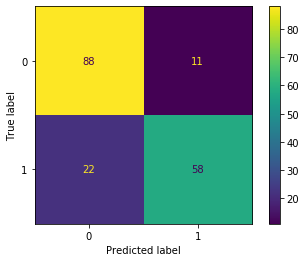

In [103]:
metrics.plot_confusion_matrix(m, X_test_use, y_test_use); #shows wrong and right predicted values of real y's based on X_test_use

In [104]:
#metrics.accuracy_score(y_test,y_test_pred) #is the same like m.score!!

In [105]:
#precision=metrics.precision_score(y_test_use,y_test_pred)
#precision

In [106]:
#recall=metrics.recall_score(y_test_use,y_test_pred)
#recall

In [107]:
#f1=metrics.f1_score(y_test_use,y_test_pred)
#f1

## Random Forest

In [108]:
m_rf=RandomForestClassifier(max_depth=2,n_estimators=100) #n is number of decision trees
m_rf.fit(X_train_use,y_train_use)

/home/christoph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
y_train_pred_rf=m_rf.predict(X_train_use)


In [110]:
m_rf.score(X_train_use,y_train_use)

0.7978910369068541

In [111]:
y_test_pred_rf=m_rf.predict(X_test_use)

In [112]:
m_rf.score(X_test_use,y_test_use)

0.776536312849162

# Submit to Kaggle - Step 6

## load test.csv

In [113]:
X_kaggle= pd.read_csv(path+'/test.csv', sep=",") #Attention: this data file contains ALL the data, not just the train set!
X_kaggle.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [114]:
X_kaggle.info() #Feature Engineering für Age, Ticket, Embarked und Fare, Cabin wird entfernt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [115]:
useful_cols=['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']
X_kaggle_use=X_kaggle.copy()[useful_cols]
X_kaggle_use

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q
3,3,male,27.0,0,0,315154,8.6625,S
4,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1,female,39.0,0,0,PC 17758,108.9000,C
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,male,NaN,0,0,359309,8.0500,S


## Feature Engineering

### Age and Fare

In [116]:
#groupmean of Sex
groupmean_age=X_kaggle.groupby('Sex')['Age'].transform('mean') #calculates mean of male/female
groupmean_age
X_kaggle_use['Age'].fillna(groupmean_age,inplace=True) #apply groupmean to column Age depending on Sex
#mean of fare
groupmean_fare=X_kaggle['Fare'].mean() #calculates mean Fare
groupmean_fare
X_kaggle_use['Fare'].fillna(groupmean_fare,inplace=True) #apply mean to NaNś of Fare

In [117]:
X_kaggle_use.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Ticket

In [118]:
#1. Creat to df, save them in a list
col_num_Ticket=X_kaggle_use.columns.get_loc('Ticket')
col_num_Ticket
liste=[X_kaggle_use]

In [119]:
#2. do the list comprehension instead of for-loop
col_old='Ticket'
col_new='Ticket_same'
#subsets = [train for train, test in shuffle_split.split(X_train)]
list_compr = [encode_ticket(df,col_old,col_new) for df in liste]

In [120]:
X_kaggle_use.shape

(418, 8)

### Sex

In [121]:
# Sex
pd.factorize(X_kaggle['Sex'])[0]
X_kaggle_use['is_female']=pd.factorize(X_kaggle['Sex'])[0]
try:
    X_kaggle_use.drop('Sex',axis=1,inplace=True)
except:
    None

### Embarked

In [122]:
ohe=['Embarked']      
for i in ohe:
    X_kaggle_use=encoding(X_kaggle_use,i)

In [123]:
X_kaggle_use.shape[1]==X_train_use.shape[1]

True

In [124]:
#y_kaggle=m.predict(X_kaggle_use) #LogReg


In [125]:
y_kaggle=m_rf.predict(X_kaggle_use) #randomforest

## submission csv

In [126]:
df_survived = pd.DataFrame(y_kaggle, columns = ['Survived'])
submission=pd.concat([X_kaggle['PassengerId'],df_survived],axis=1)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [127]:
submission.to_csv("submission.csv", index=None)